In [214]:
import pandas as pd
df=pd.read_csv(r"I:\Awais\AI\ML\ML datasets\Bank Customer Churn\Bank Customer Churn Prediction.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [215]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(7)
df.drop(columns=["customer_id"],inplace=True)

LE=LabelEncoder()
df["churn"]=LE.fit_transform(df["churn"])
OHE=OneHotEncoder(sparse_output=False)
cat_columns=["country","gender","credit_card","active_member"]
df[cat_columns]=df[cat_columns].astype(str)
encoded=pd.DataFrame(OHE.fit_transform(df[cat_columns]),columns=OHE.get_feature_names_out(cat_columns),index=df.index)

df=df.drop(columns=cat_columns)
df=pd.concat([df,encoded],axis=1)

x=df.drop("churn",axis=1)
y=df["churn"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [216]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier , GradientBoostingClassifier, HistGradientBoostingClassifier 
import xgboost as xgb
from time import time
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

Logistic_Regression=make_pipeline(StandardScaler(),LogisticRegression())
models_dict={
"Logistic_Regression":Logistic_Regression,
"Decision_Tree":DecisionTreeClassifier(max_depth=4),
"Random_Forest":RandomForestClassifier(n_estimators=100,criterion="gini",max_depth=6,min_samples_leaf=3),
"AdaBoost_Classifier":AdaBoostClassifier(n_estimators=30,random_state=42),
"Bagging":BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=21,random_state=42),
"Gradient_Boosting":GradientBoostingClassifier(n_estimators=100,learning_rate=0.2,random_state=42),
"Histogram_Gradient_Boosting":HistGradientBoostingClassifier(random_state=42),
"XG_Boost":xgb.XGBClassifier(eval_metric="logloss",random_state=42)}
models_dict["Voting_Classifier"]=VotingClassifier(estimators=[('Random_Forest',models_dict["Random_Forest"]),('Histogram_Gradient_Boosting',models_dict["Histogram_Gradient_Boosting"]),('Logistic_Regression',models_dict["Logistic_Regression"])],voting='soft')

c:\Users\Optimus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


                         Model  Accuracy  F1 Score  Time Taken
0            Gradient_Boosting    0.8730  0.629738    1.215246
1  Histogram_Gradient_Boosting    0.8680  0.619597    0.513681
2          AdaBoost_Classifier    0.8650  0.597015    0.231855
3                      Bagging    0.8530  0.596154    0.674582
4                     XG_Boost    0.8560  0.592068    0.151906
5                Decision_Tree    0.8545  0.544601    0.019988
6            Voting_Classifier    0.8620  0.541528    1.040354
7                Random_Forest    0.8620  0.520833    0.496691
8          Logistic_Regression    0.8125  0.329159    0.020988


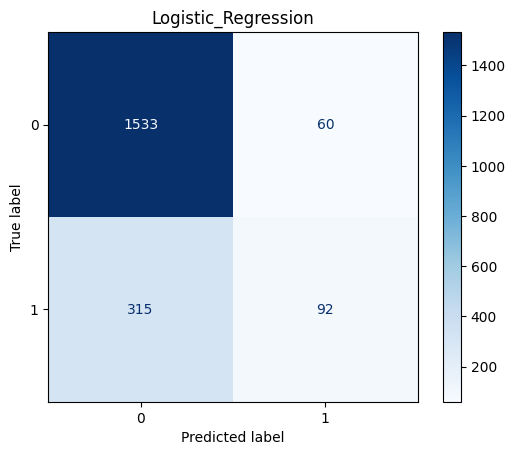

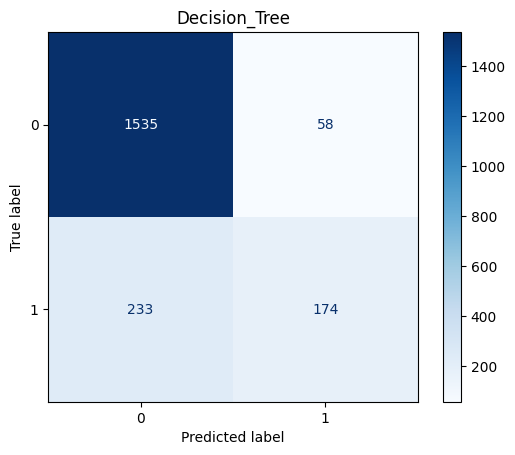

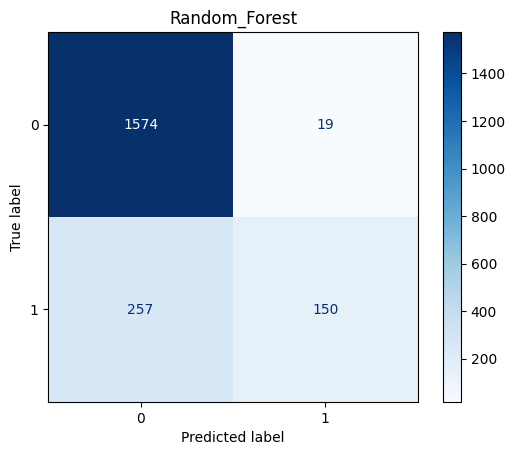

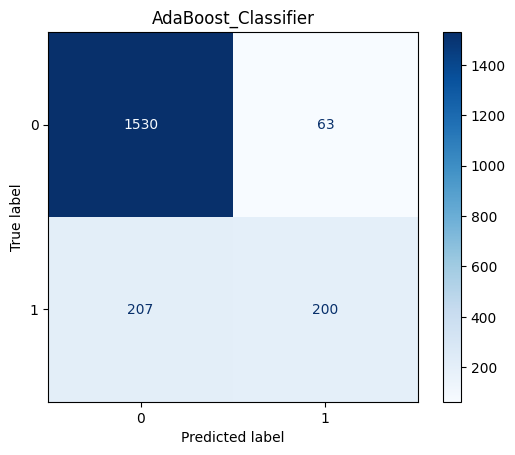

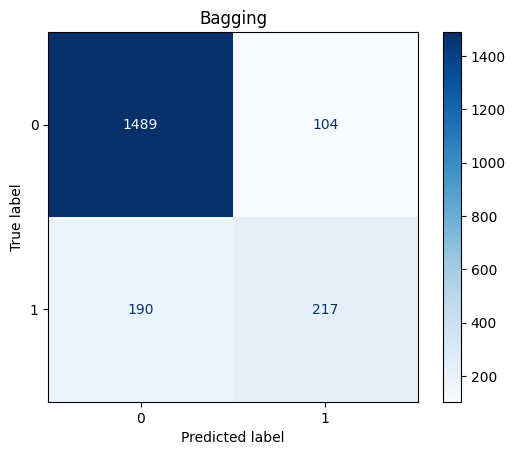

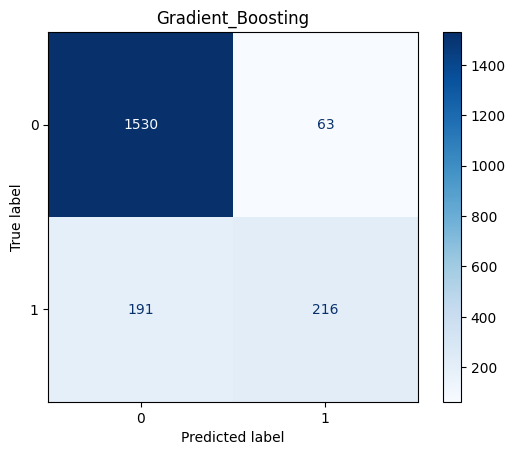

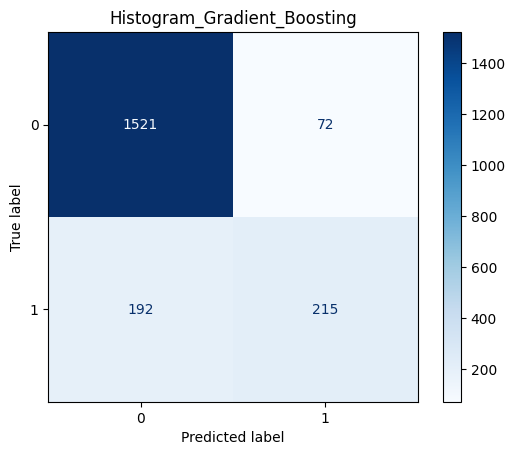

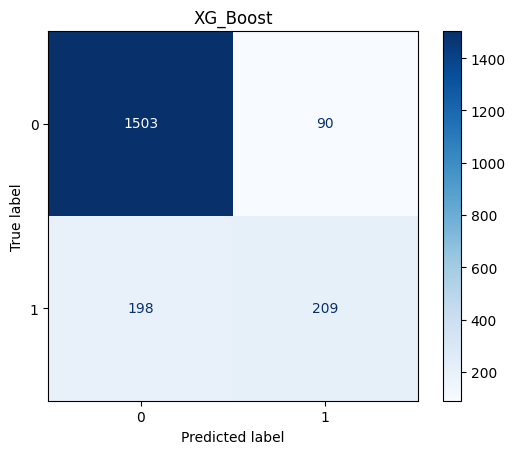

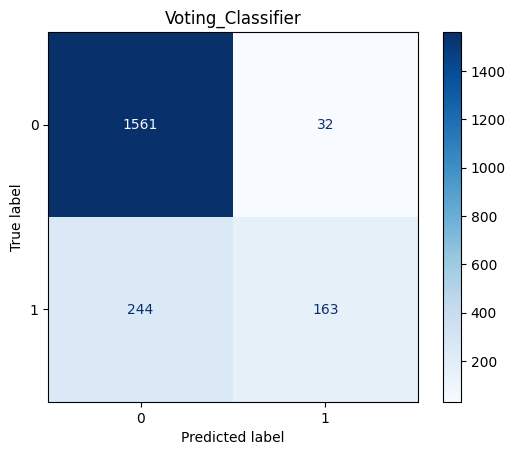

In [217]:
results=[]
for name,model in models_dict.items():
    now1=time()
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    acc=accuracy_score(y_test,prediction)
    now2=time()
    f1=f1_score(y_test,prediction)
    c_m=confusion_matrix(y_test,prediction)
    display=ConfusionMatrixDisplay(confusion_matrix=c_m,display_labels=[0,1])
    display.plot(cmap=plt.cm.Blues)
    plt.title(f"{name}")
    results.append({"Model":name,"Accuracy":acc,"F1 Score":f1,"Time Taken":now2-now1})
results_=pd.DataFrame(results).sort_values(by="F1 Score",ascending=False,ignore_index=True)
print(results_)